# 1. Preliminary Data Analysis

## 1.1 Importing the libraries

In [1]:
#importing and pre-processing data
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler 
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency


#visualizing data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#training data 
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb 
import lightgbm as ltb

#checking models accuracy
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

## 1.2 Dataset

In [2]:
df=pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1. We can observe that _**education-num**_ and _**education**_ are the same variables with different data types. We can drop any one of them.
2. We have _**categorical**_ and _**numerical variables**_.

## 1.3 Columns & thier Datatypes

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We need to convert all variables to the _**same datatype**_ for classification.

## 1.3 Summary Statistics

In [4]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


1. There's _**no missing data**_ as all counts are same.
2. There is _**presence of outliers**_ in the dataset in various columns.
3. There data has _**skewness**_ too.

## 1.4 Distinct column values

In [5]:
for i in df.columns:
    print(i,":\n",df[i].unique())

age :
 [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass :
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
fnlwgt :
 [ 77516  83311 215646 ...  34066  84661 257302]
education :
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
education-num :
 [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status :
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation :
 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming

## 1.3 Summary Statistics

We can observe that the _**workclass**_,_**occupation**_ & _**country**_ column has _**'?'**_ values which _**means none**_.

### 1.4.1 Amount of wrong column values in the dataset

In [6]:
for i,j in zip(df.columns,(df.values.astype(str) == ' ?').sum(axis = 0)):
    if j > 0:
        print(str(i) + ': ' + str(j) + ' records')

workclass: 1836 records
occupation: 1843 records
country: 583 records


### 1.4.2 Relationship between Null values('?') and Dependent Variable

In [7]:
null_columns = ['workclass', 'occupation', 'country']

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

for col in null_columns:
    print("{0}: {1}".format(col.title(), cramers_v(df[col], df['salary'])))

Workclass: 0.17852352708759311
Occupation: 0.35128641504478464
Country: 0.09210697878806691


-  _**?**_ has only a significant effect on the _**occupation**_ column, since it has a _**cramer's v score**_ greater than _**0.3**_ hence we replace the _**?**_ values with the _**mode**_ of the column

In [8]:
df["occupation"] = df["occupation"].replace(' ?', np.nan)
df["occupation"] = df["occupation"].fillna(df["occupation"].mode()[0])

## 2. Exploratory Data Analysis

## 2.1  categorical columns

#### 2.1.1 Workclass

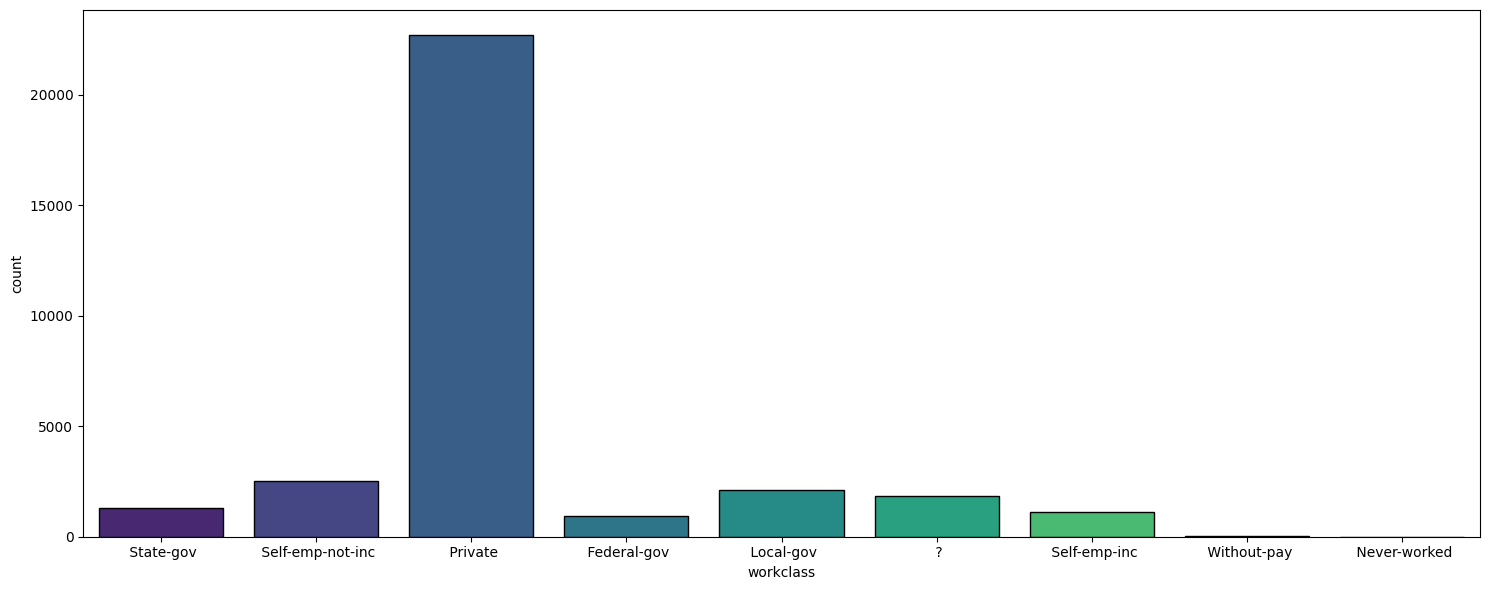

In [9]:
plt.figure(figsize=(15,6))
sns.countplot(x=df['workclass'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.show()

1. The dominant values are only of _**Private Sector**_.
2. The mode _**workclass**_ value is _**Private**_ therefore it can be grouped into _**Private**_, __**Self-Employed**_ & _**Non-Private**_.

#### 2.1.2 Country

C:\Users\USER\AppData\Local\Temp\ipykernel_14084\1351559041.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(


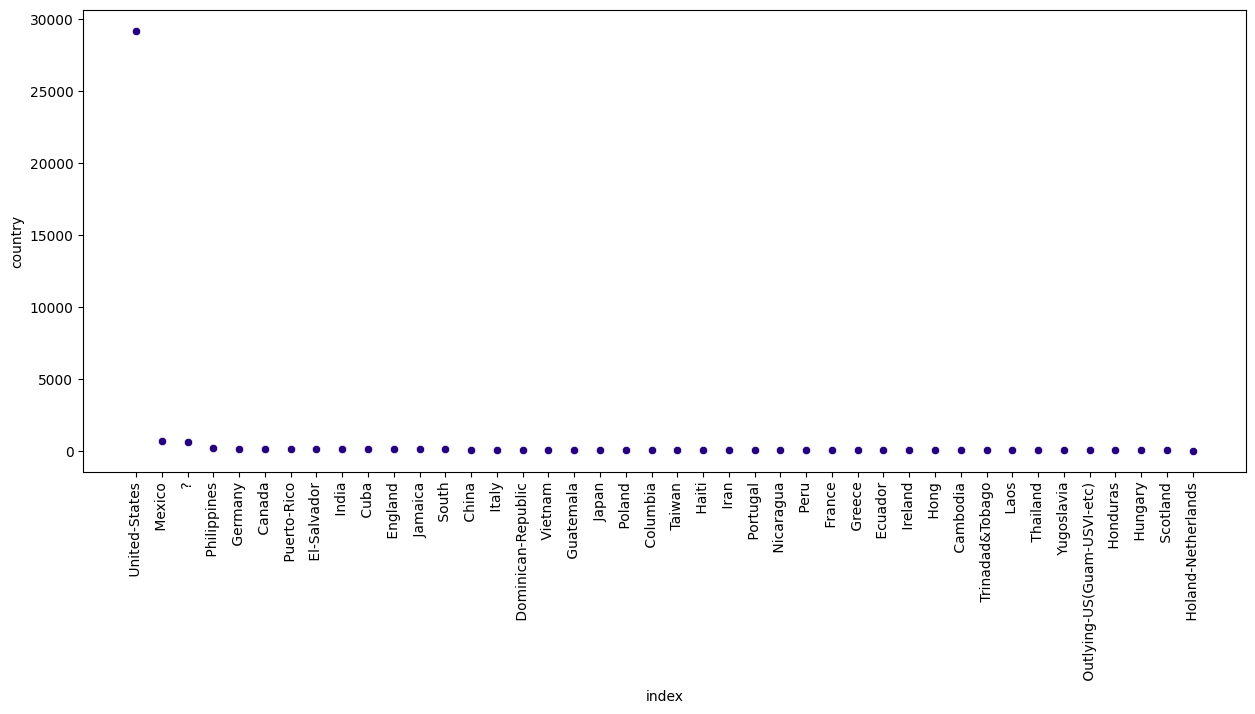

In [10]:
plt.figure(figsize=(15,6))
df_con=pd.DataFrame(data=df["country"].value_counts())
df_con=df_con.reset_index()
g=sns.scatterplot(data=df["country"], y=df_con["country"], x=df_con["index"],color="#250180")
g.set_xticklabels(
    labels=df_con["index"], rotation=90)
# Show the plot
plt.show()

1. The dominant values are only of _**United-States**_.
2. The mode _**country**_ value is _**United-States**_ therefore it can be grouped into _**US**_ & _**Non-US**_.

#### 2.1.3 Occupation

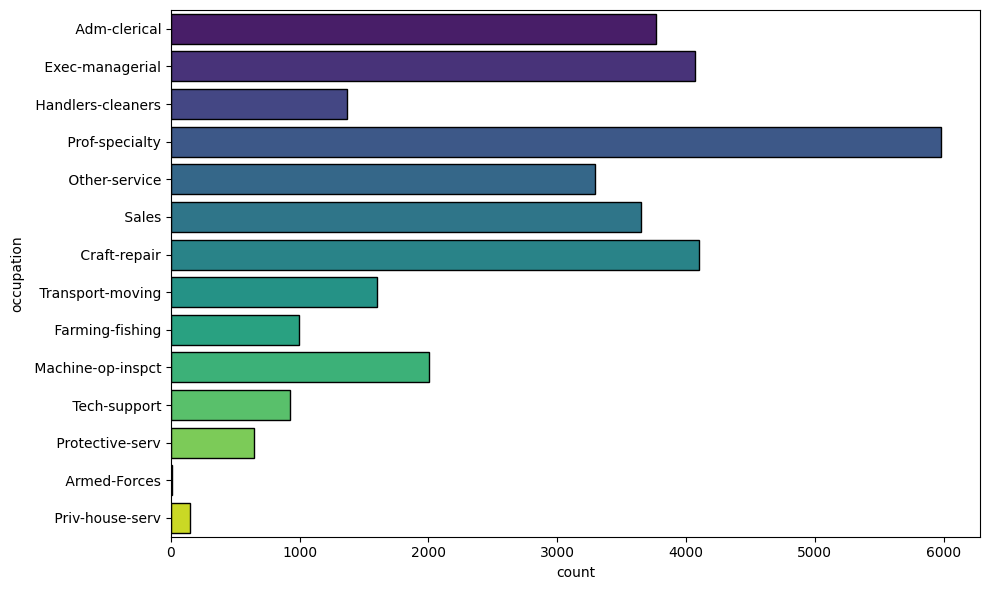

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['occupation'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.show()

1. The dominant values are only of _**Prof-Specialty**_.
2. The population follows a somewhat **uniform distribution** excluding the **armed forces**

### 2.1.4 Race

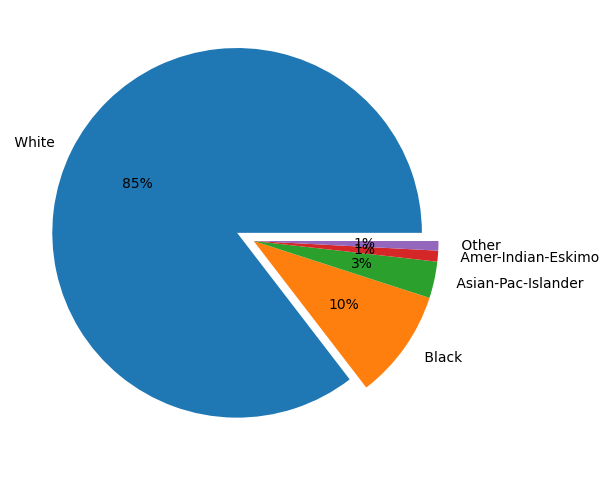

In [12]:
plt.figure(figsize=(10,6))
df_con=pd.DataFrame(data=df["race"].value_counts())
df_con=df_con.reset_index()
plt.pie(df_con["race"], labels=df_con["index"],explode=[0.1,0.0,0.0,0.0,0.0],autopct='%1.0f%%')
plt.show()

1. The dominant values are only of _**white**_.
2. The mode _**race**_ value is _**white**_ therefore it can be grouped into _**white**_ and _**non-whites**_.

### 2.1.5 Hours per week

<AxesSubplot: xlabel='hours-per-week', ylabel='Count'>

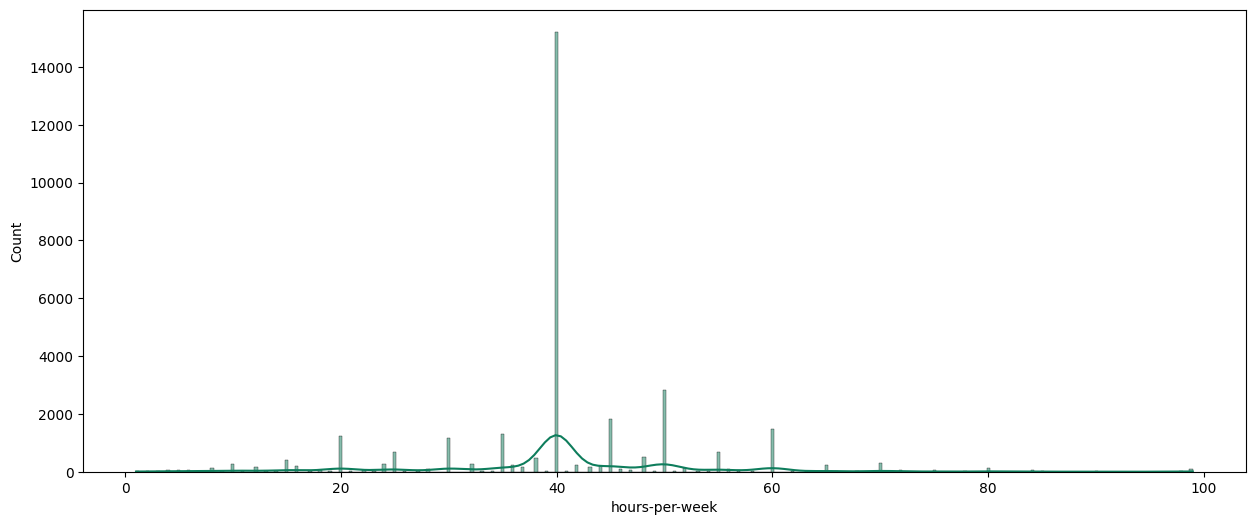

In [13]:
plt.figure(figsize=(15,6))
sns.histplot(data=df['hours-per-week'], x=df['hours-per-week'], element="bars",kde=True, color="#0e7d5c")

1. The dominant value is _**40**_.
2. The mode _**hours-per-week value**_ is _**40**_ therefore it can be grouped into _**3**_ categories: _**<40**_, _**>40**_ and _**=40**_.

## 2.2 Visualising relationships of all columns with salary(target column).

### 2.2.1 Age & Salary

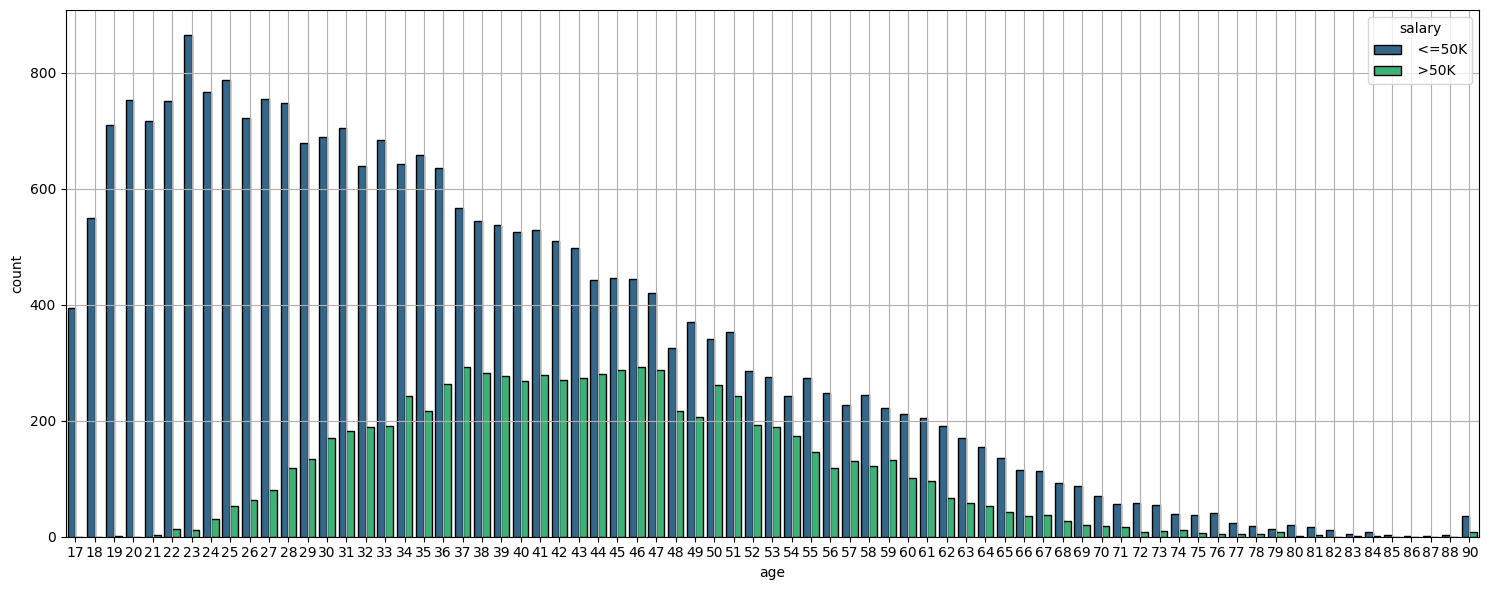

In [14]:
# crosstb = pd.crosstab(df.age, df.salary)
# barplot = crosstb.plot.bar(rot=0,figsize = (15,6))
# plt.xticks(rotation = 90)
# plt.show()

plt.figure(figsize=(15,6))
sns.countplot(x=df['age'],hue=df['salary'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

1. We infer that _**min salary**_ of most of the population is in their _**20's**_ which is a valid as it is the starting time of a career
2. _**Age**_ and _**Salary**_when combined a follows nearly a _**guassian distribution**_.
3.   _**Ages**_:  _**37**_ and  _**46**_ has the highest chance of making >50K.
4. The data is _**left skewed**_ as there are a very few people who work after 60's, therefore,the chances of salary being more than 50k is very less.

### 2.2.2 Workclass & Salary

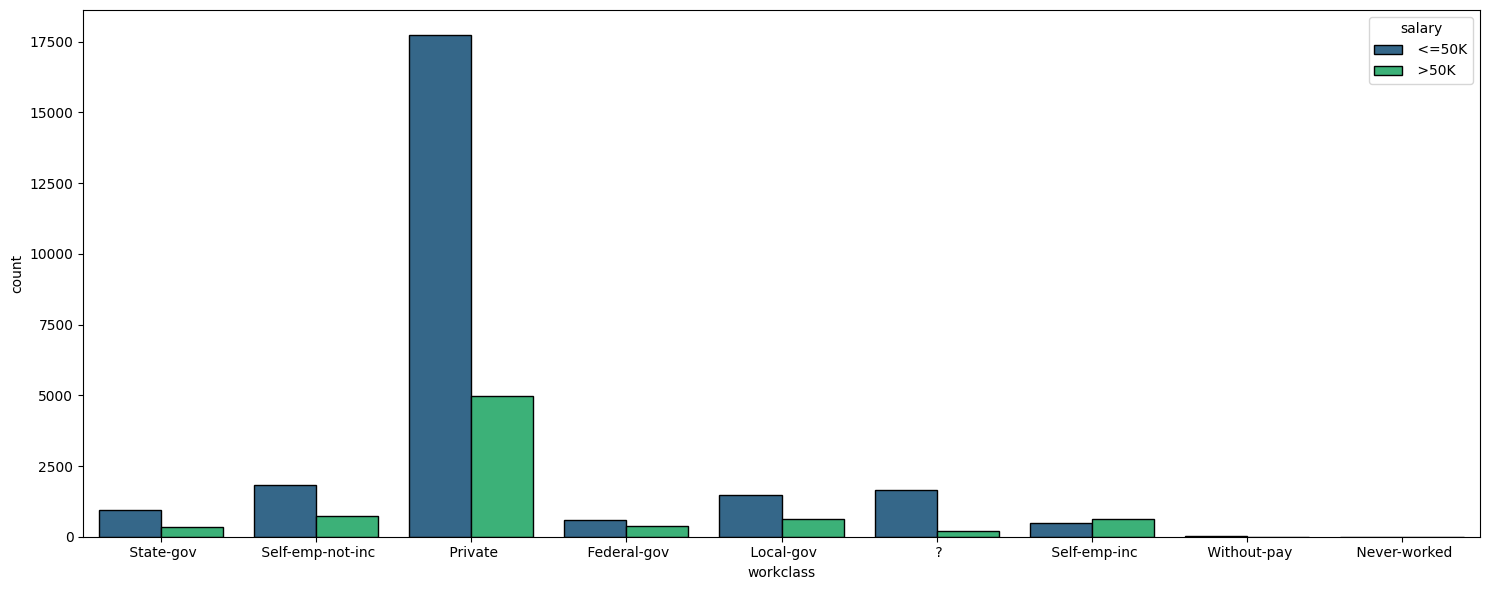

In [15]:
plt.figure(figsize=(15,6))
sns.countplot(x=df['workclass'],hue=df['salary'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.show()

1. We infer that _**salary**_ of most of the population be it <= or > 50k is occupied by the _**Private**_ sector and only a few people belonging to the private secotr have a salary greater than 50k but still is more than all the other sectors recieving salary greater than 50k.
2. In the  _**Public Sector**_, there is the highest chance to earn >50k if working for the _**federal government**_.
3. There is a higher chance to earn >50k via **incorporated self employment** compared to **unincorporated self-employement**

### 2.2.3 Education & Salary

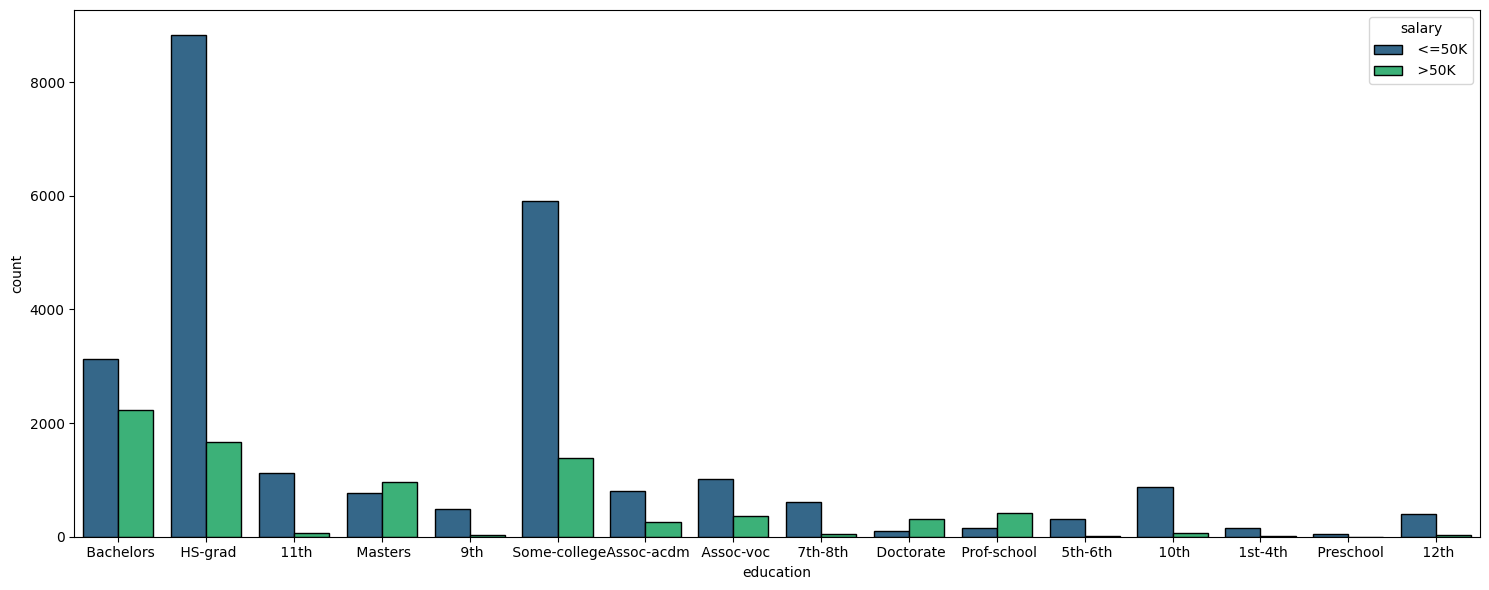

In [16]:
plt.figure(figsize=(15,6))
sns.countplot(x=df['education'],hue=df['salary'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.show()

1. A person having a bachelors degree has _**60:40**_ chances of getting _**<= or > 50 k**_ salary.
2.  A person being a highschool graduate has _**85:15**_ chances of getting _**<= or > 50 k**_ salary. As most of the population is concentrated in highschool passout, this reflects that most of the people do not cotinue their studies after school.
3. _**Some-college**_: A person who attended a college but did not complete the degree program is certainly likely to have  _**75:25**_ chances of getting _**<= or > 50 k**_ salary. There is concentration of population, which shows that there are alot of college droupouts.
4. Another noticable thing is that only a very few pople complete their masters program but one with a degree has a _**45:55**_ chance of getting _**<= or > 50 k**_ salary and also,  fewer people complete their doctorate degrees or are professors in school having a  _**30:70**_ chance of getting  _**<= or > 50 k**_ salary.

### 2.2.4 Marital Status & Salary

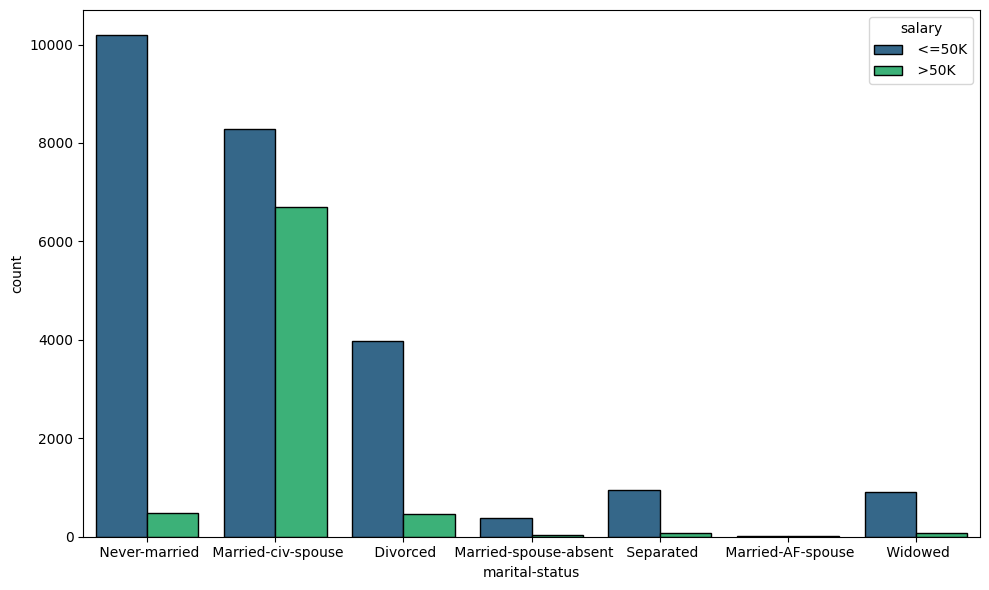

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['marital-status'],hue=df['salary'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.show()

We infer that the population is broadly divided into three groups:
1. A divorced person has _**90:10**_ chances of getting _**<= or > 50 k**_ salary.
2. A person married to a civillian spouse has _**53:47**_ chances of getting _**<= or > 50 k**_ salary.  As most of the population is concentrated here, this reflects that most of the people are not married.
3. A person who has never married has _**95:05**_ chances of getting _**<= or > 50 k**_ salary and most of the population is not married.
4. We can divide the population into 3 Cateogries:  _**Married**_, _**Not-Married**_ and _**Divorced**_.


### 2.2.5 Occupation & Salary

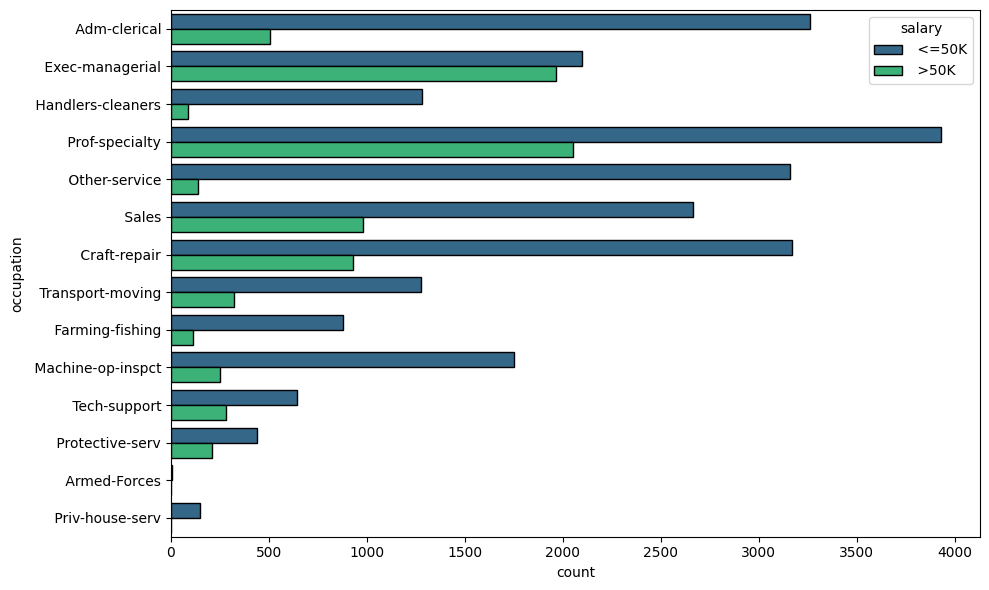

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['occupation'],hue=df['salary'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.show()


1. Population is distributed in all of the occupational fields with _**minimum in armed forces**_ & _**maximum in prof-speciality**_.
2. Being in an _**executive managerial**_ position gives equal chances of getiing a _**<= or > 50k**_ salary followed by _**prof-speciality**_.
3.  _**Farming-Fishing**_,  _**Other services**_ and  _**Handler cleaners**_ is significantly lower than the rest of the distribution

### 2.2.6 Relationship & Salary

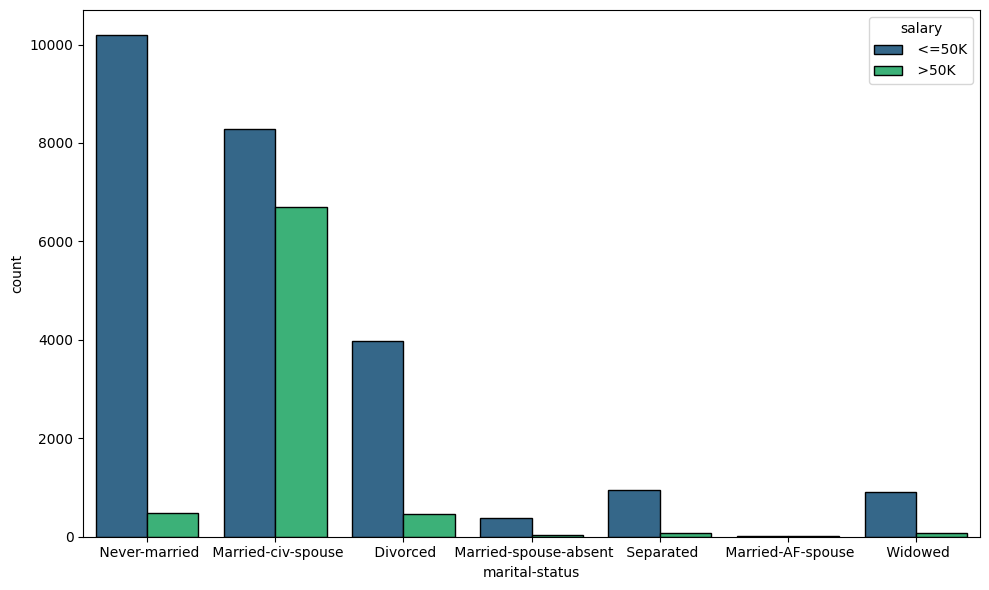

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['marital-status'],hue=df['salary'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.show()

1. Most of the people who are earning lie in the category of _**husbands**_. They have a _**55:45**_ chances of getting _**<= or > 50 k**_ salary.
2. A person being an earning _**wife**_ has equal chances of getting _**<= or > 50 k**_ salary.

### 2.2.7 Race & Salary

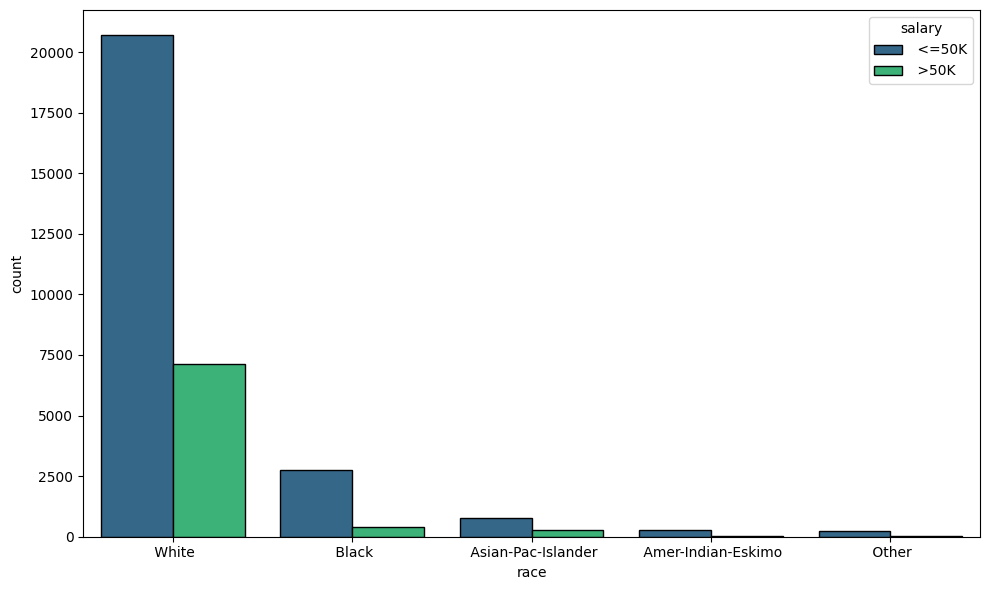

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['race'],hue=df['salary'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.show()

Most of the population is _**white**_ and has _**75:25**_ chance of getting _**<= or > 50 k**_ salary.

### 2.2.8 Gender & Salary

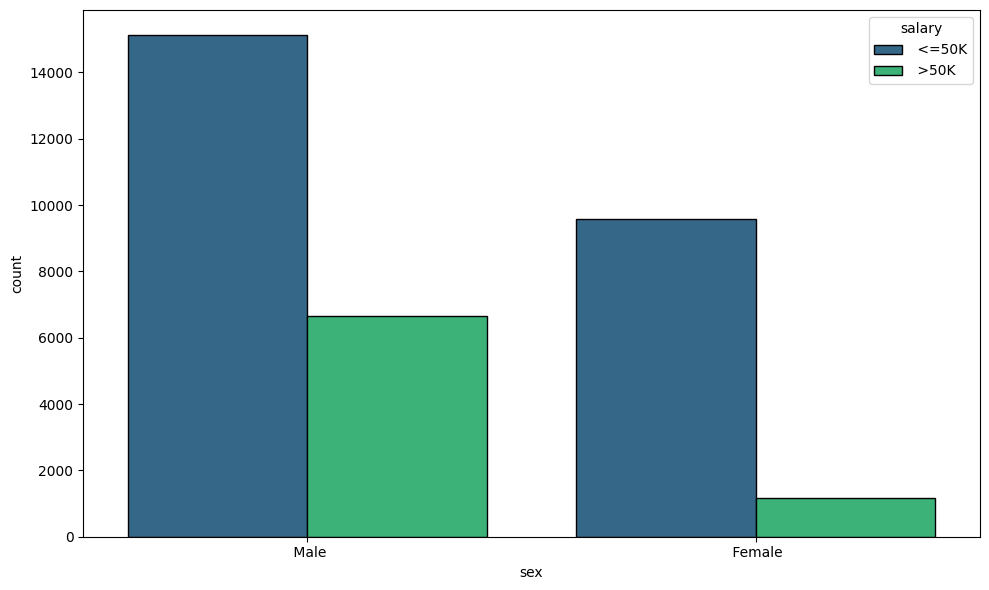

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['sex'],hue=df['salary'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.show()

1. Most of the earning populations is male and has _**70:30**_ chance of getting _**<= or > 50 k**_ salary.
2. Females have _**90:10**_ chance of getting _**<= or > 50 k**_ salary.

### 2.2.9 Country & Salary

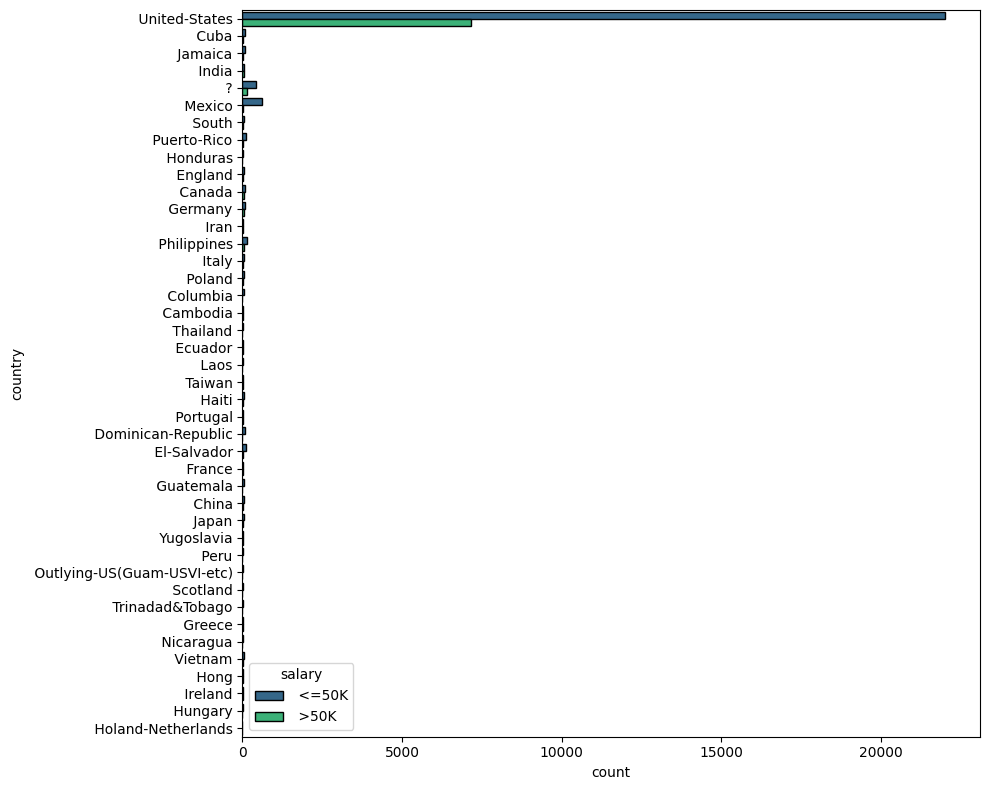

In [22]:
plt.figure(figsize=(10,8))
sns.countplot(y=df['country'],hue=df['salary'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.show()

The only country having max population is United-States where _**75:25**_ is the chance of getting _**<= or > 50 k**_ salary.

### 2.2.10 Hours Per Week & Salary

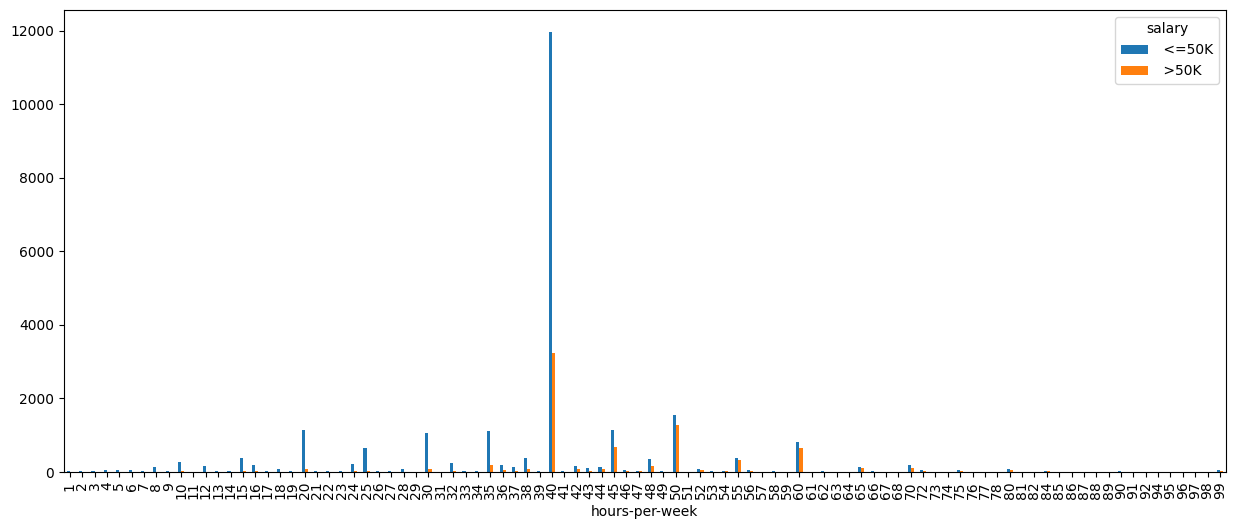

In [23]:
crosstb = pd.crosstab(df["hours-per-week"], df.salary)
barplot = crosstb.plot.bar(rot=0,figsize=(15,6))
plt.xticks(rotation = 90)
plt.show()

Most of the people work for 40 hours per week & have _**77:35**_  chance of getting _**<= or > 50 k**_ salary.

### 2.2.11 Education number,Race & Salary

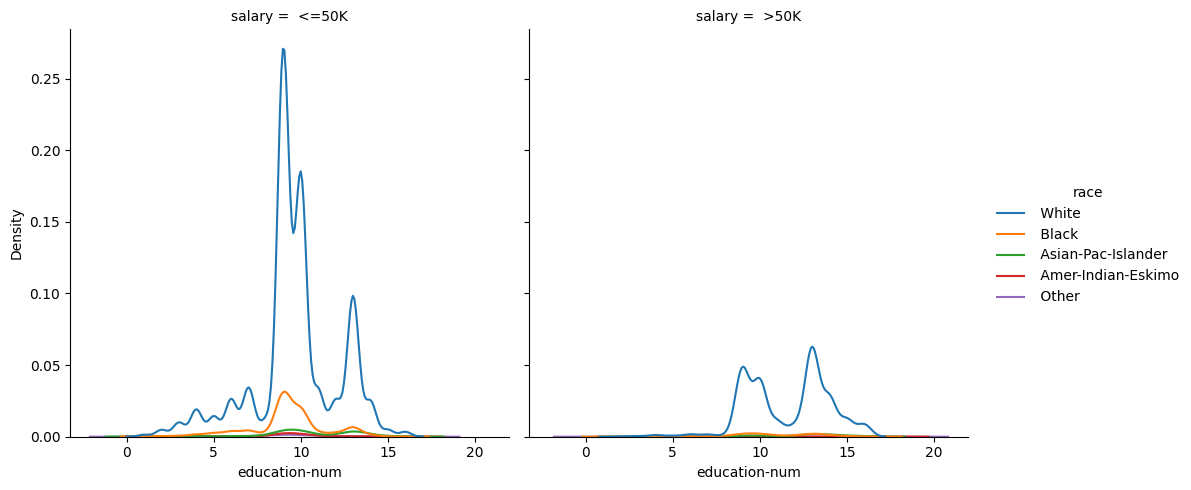

In [24]:
sns.displot(data=df, x=df["education-num"], hue=df["race"], col=df["salary"], kind="kde")

1. Most of the people who are _**white**_ recieve education for around _**9 years**_ and get a salary of _**<=50 k**_.
2. Very few _**white**_ people seem to get education for around _**13 years**_ and recieve a salary of _**>50 k**_.
3. All _**other races**_ do _**not**_ get that _**much education**_ and therefore have low salary.

### 2.2.12 Hours per week,relationship & Salary

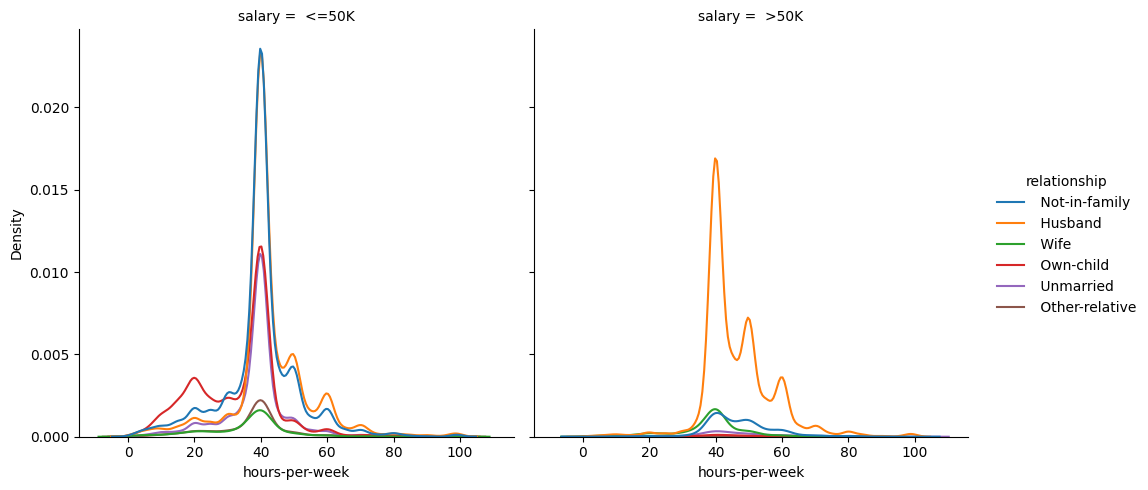

In [25]:
sns.displot(data=df, x=df["hours-per-week"], hue=df["relationship"], col=df["salary"], kind="kde")

1. Most of the people who are _**not in family**_ work for around _**40 hours per week**_ and get a salary of _**<=50 k**_.
2. People who have a relationship of _**husband**_ work for around _**40 hours per week**_ and recieve a salary of _**>50 k**_.

## 2.2  Numerical columns

### 2.2.1 Age

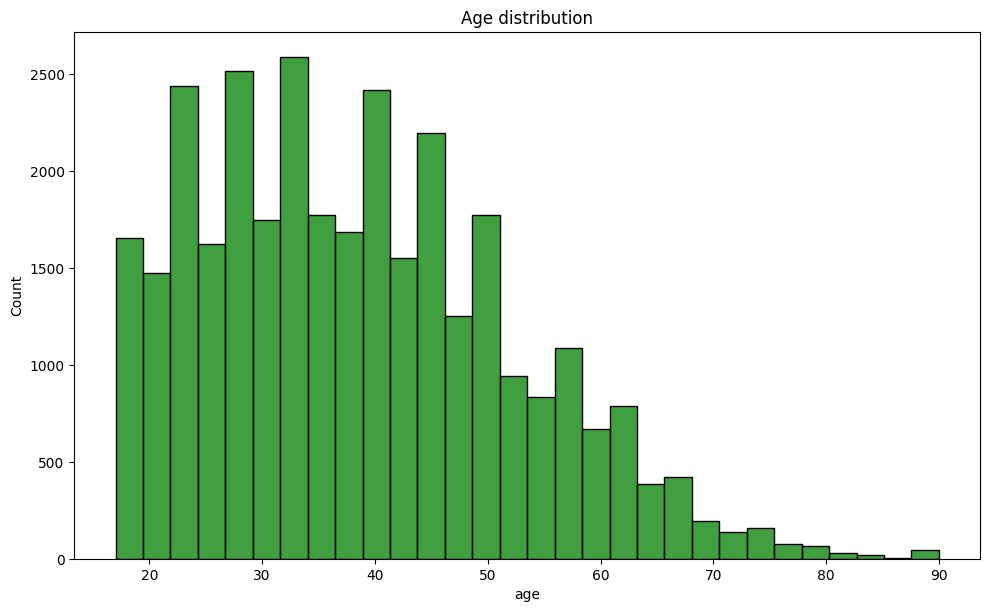

In [27]:
plt.figure(figsize=(10,6))
sns.histplot(df['age'],color='green',bins=30)
plt.tight_layout()
plt.title('Age distribution')
plt.show()

### 2.2.2 fnlwgt

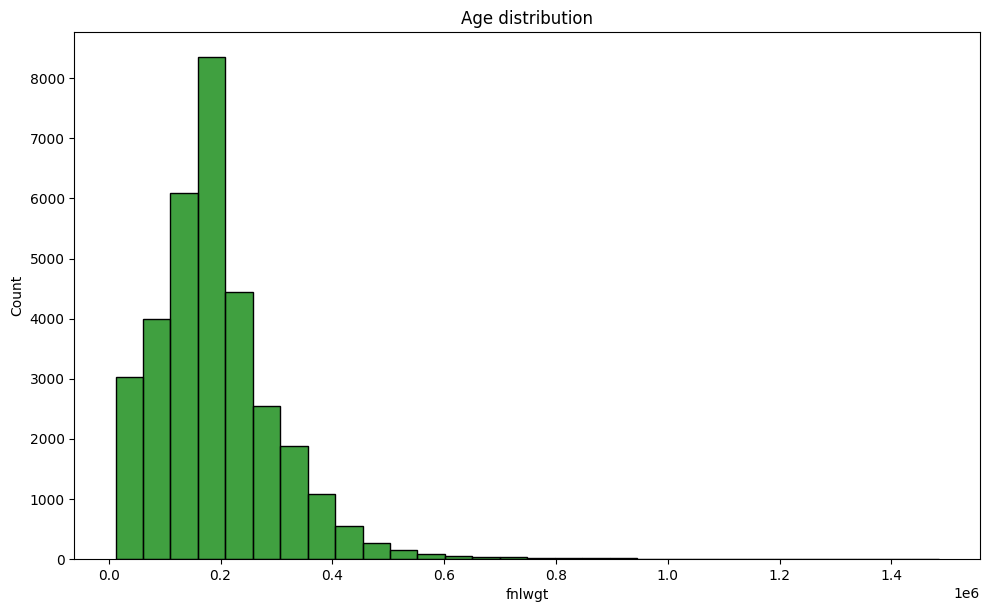

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(df['fnlwgt'],color='green',bins=30)
plt.tight_layout()
plt.title('Age distribution')
plt.show()

### 2.2.2 Captial-gain

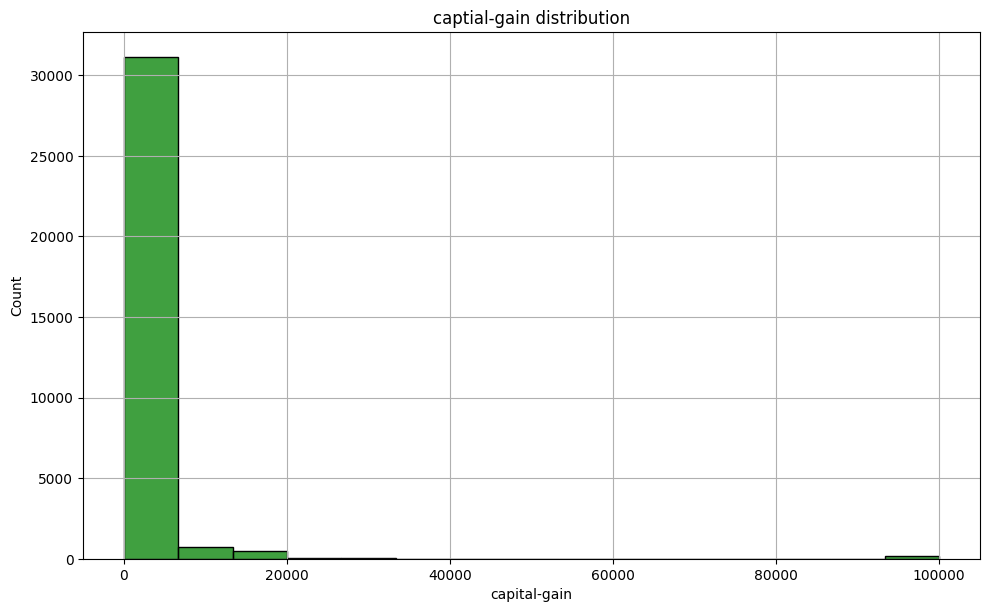

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(df['capital-gain'],color='green',bins=15)
plt.tight_layout()
plt.grid(True)
plt.title('captial-gain distribution')
plt.show()

### 2.2.3 Capital-loss

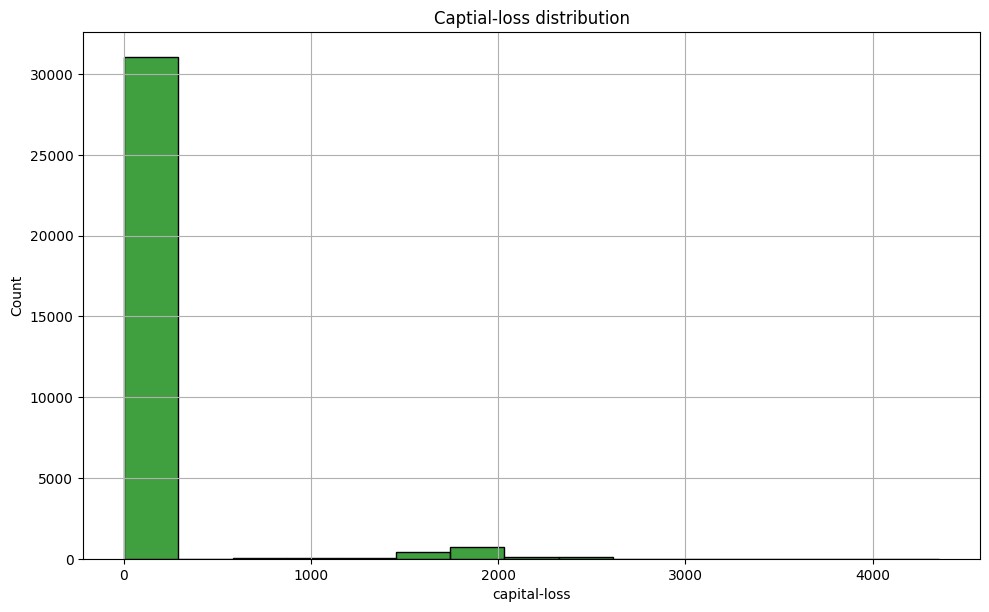

In [29]:
plt.figure(figsize=(10,6))
sns.histplot(df['capital-loss'],color='green',bins=15)
plt.tight_layout()
plt.grid(True)
plt.title('Captial-loss distribution')
plt.show()

**Left-Skewed Data:**
1. Age
2. Fnlwgt

**Outliers:**
1. Fnlwgt
2. Education-num
3. Capital-gain
4. Capital-loss

## **Summary**
_For getting salary >50k one must lie in the following categories:_
* **Age** : 37-50
* **Workclass** : Private/Self-Employed
* **Education** : Bachelors/Masters/Prof-School
* **Marital Status** : Married-civ-spouse
* **Occupation** : Exec-manager/Prof-Speciality
* **Relationship** : Husband/wife
* **Race** : White
* **Gender** : Male
* **Country** : United-States
* **Hours per week** : >40

# 3. Data Preprocessing

## 3.1 Feature Engineering

In [31]:
for dataset in [df]:
    dataset.loc[dataset['country'] != ' United-States', 'country'] = 0
    dataset.loc[dataset['country'] == ' United-States', 'country'] = 1
    dataset.loc[dataset['race'] != ' White', 'race'] = 0
    dataset.loc[dataset['race'] == ' White', 'race'] = 1
    dataset.loc[dataset['workclass'] != ' Private', 'workclass'] = 0
    dataset.loc[dataset['workclass'] == ' Private', 'workclass'] = 1
    dataset.loc[dataset['hours-per-week'] <= 40, 'hours-per-week'] = 0
    dataset.loc[dataset['hours-per-week'] > 40, 'hours-per-week'] = 1

## 3.2 Encoding the categorical columns

In [32]:
for col in df[df.columns]:
    if df[col].dtypes == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
df = df.astype(int)
df=df.drop(["education"],axis=1)
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,0,77516,13,4,0,1,1,1,2174,0,0,1,0
1,50,0,83311,13,2,3,0,1,1,0,0,0,1,0
2,38,1,215646,9,0,5,1,1,1,0,0,0,1,0
3,53,1,234721,7,2,5,0,0,1,0,0,0,1,0
4,28,1,338409,13,2,9,5,0,0,0,0,0,0,0


We dropped the _**education**_ column because it is same as _**education-num**_.

# 4. Model Development & Classification

## 4.1 Data preparation

In [33]:
X= df.drop(['salary'],axis=1)
y=df['salary']
y.value_counts(normalize=True)

0    0.75919
1    0.24081
Name: salary, dtype: float64

We need to do _**sampling**_ to _**remove bias**_ in training model.

In [34]:
rs = RandomOverSampler(random_state=30)
rs.fit(X,y)

RandomOverSampler(random_state=30)

In [35]:
X_new,y_new = rs.fit_resample(X, y)
y_new.value_counts(normalize=True)

0    0.5
1    0.5
Name: salary, dtype: float64

## 4.2 Training the dataset

In [36]:
split_size=0.3

#Creation of Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X_new,y_new,test_size=split_size,random_state=22)

#Creation of Train and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=5)

In [37]:
print ("Train dataset: {0}{1}".format(X_train.shape, y_train.shape))
print ("Validation dataset: {0}{1}".format(X_val.shape, y_val.shape))
print ("Test dataset: {0}{1}".format(X_test.shape, y_test.shape))

Train dataset: (27686, 13)(27686,)
Validation dataset: (6922, 13)(6922,)
Test dataset: (14832, 13)(14832,)


## 4.3 Model Developement 

### 4.3.1 Initiating the model

In [38]:
models = []
names = ['Random Forest','GaussianNB','DecisionTreeClassifier','Adaboost','Xgboost','LGBM']

models.append((RandomForestClassifier(n_estimators=100)))
models.append((GaussianNB()))
models.append((DecisionTreeClassifier()))
models.append((AdaBoostClassifier()))
models.append((xgb.XGBClassifier()))
models.append((ltb.LGBMClassifier()))

### 4.3.1 Cross-vaildating models & choosing best fit.

In [39]:
kfold = KFold(n_splits=5)
for i in range(0,len(models)):    
    cv_result = cross_val_score(models[i],X_train,y_train,cv=kfold,scoring='accuracy')
    score=models[i].fit(X_train,y_train)
    prediction = models[i].predict(X_val)
    acc_score = accuracy_score(y_val,prediction)     
    print ('-'*40)
    print ('{0}: {1}'.format(names[i],acc_score))

----------------------------------------
Random Forest: 0.9099971106616584
----------------------------------------
GaussianNB: 0.624963883270731
----------------------------------------
DecisionTreeClassifier: 0.8815371279976886
----------------------------------------
Adaboost: 0.8286622363478764
----------------------------------------
Xgboost: 0.8665125686217856
[LightGBM] [Info] Number of positive: 11045, number of negative: 11103
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002643 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 529
[LightGBM] [Info] Number of data points in the train set: 22148, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498691 -> initscore=-0.005238
[LightGBM] [Info] Start training from score -0.005238
[LightGBM] [Info] Number of positive: 11010, number of negative: 11139
[Li

_**Random Forest Classifier**_ gets selected as it has the _**maximum accuracy score**_.

## 4.4 Testing the dataset

In [40]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
prediction = rf.predict(X_test)
print ('-'*40)
print ('Accuracy score:')
print (accuracy_score(y_test,prediction))
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,prediction))
print ('-'*40)
print ('Classification Matrix:')
print (classification_report(y_test,prediction))

----------------------------------------
Accuracy score:
0.9102615965480043
----------------------------------------
Confusion Matrix:
[[6404  975]
 [ 356 7097]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      7379
           1       0.88      0.95      0.91      7453

    accuracy                           0.91     14832
   macro avg       0.91      0.91      0.91     14832
weighted avg       0.91      0.91      0.91     14832



# 5.Summary

* We have a model with _**91%**_ accuracy score.
* We did not handle outliers or normalised data because random forest models does not get affected by these factors.